# Linear Regression Analysis for Predicting Wave Heights from Meteorological and Oceanographic Data

### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Load dataset

In [5]:
data=pd.read_csv('data/35.waves.csv')
data.head()

,hh,WDIR,WSPD,GST,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,WVHT
0,1,23,3.0,3.6,4.17,3.33,349,1019.1,4.7,5.1,4.2,0.39
1,2,30,2.9,3.3,5.26,4.21,358,1018.8,4.6,4.8,4.1,0.65
2,3,360,2.2,2.5,5.88,4.79,11,1018.3,4.6,4.7,4.2,0.90
3,4,355,2.5,3.1,5.88,4.95,23,1018.1,4.6,4.6,4.2,0.91
4,5,355,3.5,4.5,6.25,4.98,26,1018.3,4.5,4.6,4.0,0.88


### Data preprocessing

In [7]:
data.duplicated().sum()

0

In [9]:
data.isna().sum()

hh      0
WDIR    0
WSPD    0
GST     0
DPD     0
APD     0
MWD     0
PRES    0
ATMP    0
WTMP    0
DEWP    0
WVHT    0
dtype: int64

In [11]:
data.dtypes

hh        int64
WDIR      int64
WSPD    float64
GST     float64
DPD     float64
APD     float64
MWD       int64
PRES    float64
ATMP    float64
WTMP    float64
DEWP    float64
WVHT    float64
dtype: object

In [13]:
data.shape

(3886, 12)

In [15]:
data.size

46632

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hh      3886 non-null   int64  
 1   WDIR    3886 non-null   int64  
 2   WSPD    3886 non-null   float64
 3   GST     3886 non-null   float64
 4   DPD     3886 non-null   float64
 5   APD     3886 non-null   float64
 6   MWD     3886 non-null   int64  
 7   PRES    3886 non-null   float64
 8   ATMP    3886 non-null   float64
 9   WTMP    3886 non-null   float64
 10  DEWP    3886 non-null   float64
 11  WVHT    3886 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 364.4 KB


### Correlation Analysis


Correlation Matrix:


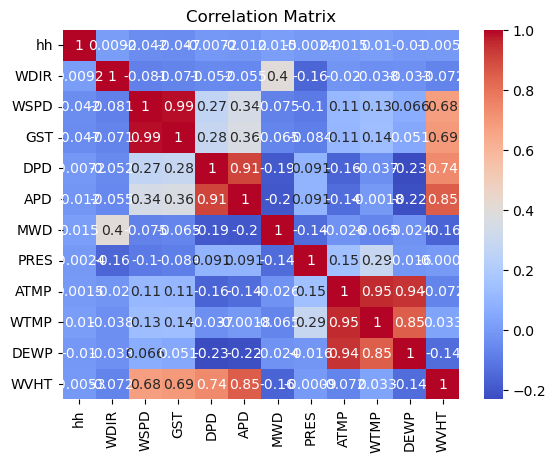

In [20]:
print("\nCorrelation Matrix:")
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Data Visualization

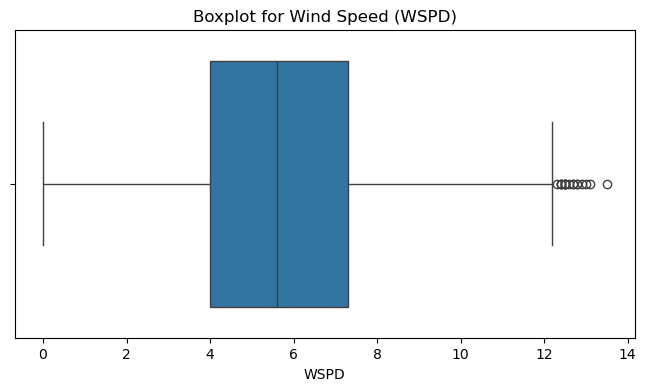

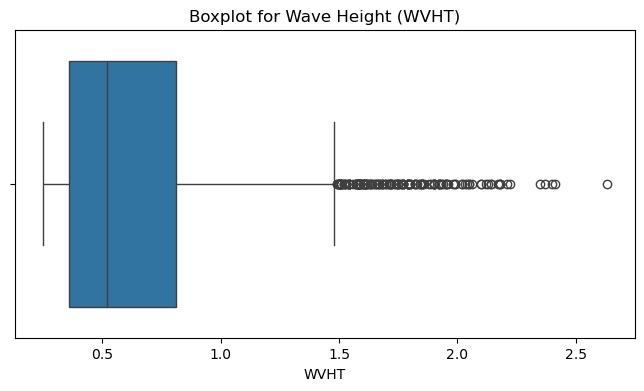

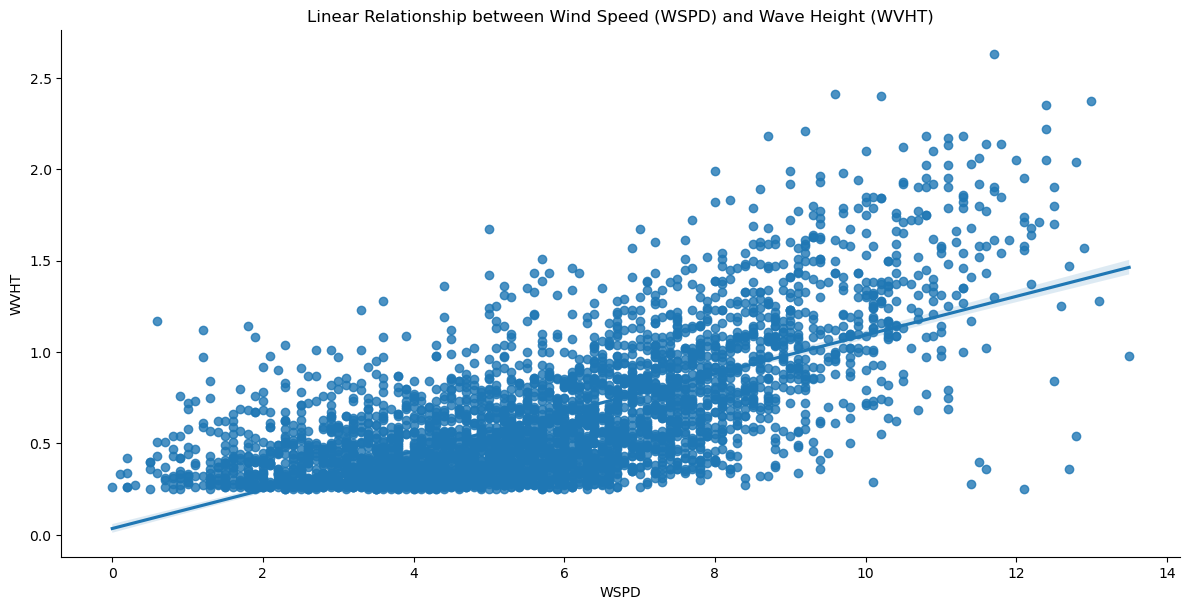

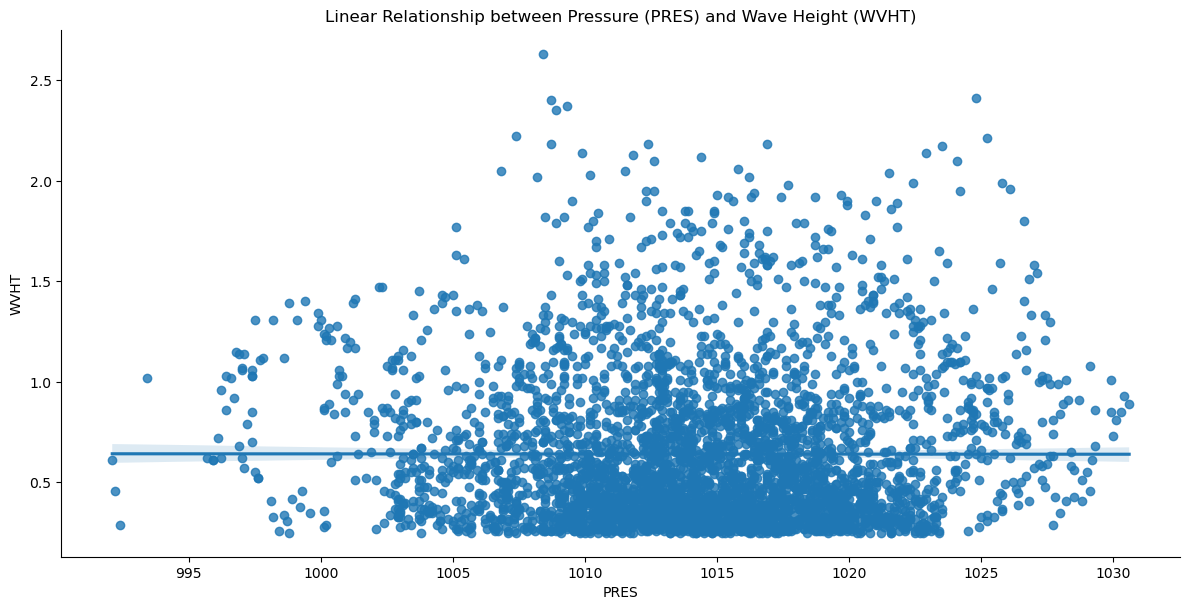

In [52]:
# Boxplot for a specific column:WSPD
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['WSPD'])
plt.title("Boxplot for Wind Speed (WSPD)")
plt.show()

# Boxplot for the target variable :WVHT
plt.figure(figsize=(8, 4))
sns.boxplot(x=data['WVHT'])
plt.title("Boxplot for Wave Height (WVHT)")
plt.show()

# lmplot to show the relationship between WSPD(feature) and WVHT(target)
sns.lmplot(x='WSPD', y='WVHT', data=data, aspect=2, height=6)
plt.title("Linear Relationship between Wind Speed (WSPD) and Wave Height (WVHT)")
plt.show()

# lmplot for another feature:PRES vs. the target
sns.lmplot(x='PRES', y='WVHT', data=data, aspect=2, height=6)
plt.title("Linear Relationship between Pressure (PRES) and Wave Height (WVHT)")
plt.show()

### Splitting the Data into Features (X) and Target (Y)

In [28]:
target = 'WVHT'  
features = data.columns.difference([target])
X = data[features]
y = data[target]

### Scaling the features

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Splitting the data into Training and Testing Sets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### linear Regression Modeling

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Predictions

In [36]:
y_pred = model.predict(X_test)
y_pred

array([0.83085117, 0.20274021, 0.09494341, 0.30438781, 0.64100624,
       0.59212653, 0.58242745, 0.36297972, 0.64980518, 0.42273588,
       0.87217584, 0.77303411, 0.42644487, 0.40732306, 0.54370479,
       0.85307494, 0.70316676, 0.33966544, 0.89996282, 1.75635902,
       0.75889085, 0.26754667, 0.89950531, 0.26832661, 0.17789206,
       0.35050111, 0.33237217, 0.52874359, 0.58995988, 0.42476371,
       0.64626802, 1.37879851, 0.58233212, 0.71490934, 0.26264922,
       0.63992742, 1.04485206, 0.33670991, 0.60240401, 0.25073618,
       0.96574733, 0.45785706, 0.29836495, 0.72262904, 0.48771679,
       0.6563211 , 0.53417275, 0.24232942, 0.2500647 , 0.7695412 ,
       0.47760676, 0.46150141, 1.16808389, 1.64234486, 0.425315  ,
       0.4665987 , 1.63858851, 0.74451713, 0.75990929, 0.62998495,
       0.36912035, 0.21478556, 0.85159182, 0.6953839 , 0.48470629,
       0.62667512, 0.59076763, 1.00289637, 0.41558381, 1.06071656,
       1.18558665, 0.8366687 , 0.92826019, 1.57372121, 0.59886

### Model Coefficients and Intercept

In [38]:
print("\nModel Coefficients:")
print(pd.DataFrame({'Feature': features, 'Coefficient': model.coef_}))
print("\nModel Intercept:")
print(model.intercept_)


Model Coefficients:
   Feature  Coefficient
0      APD     0.299274
1     ATMP    -0.038594
2     DEWP     0.022714
3      DPD    -0.042289
4      GST     0.097111
5      MWD     0.001350
6     PRES    -0.005752
7     WDIR    -0.003561
8     WSPD     0.067324
9     WTMP     0.007746
10      hh     0.009654

Model Intercept:
0.6390866880929439


### Visualization of Actual vs Predicted Values

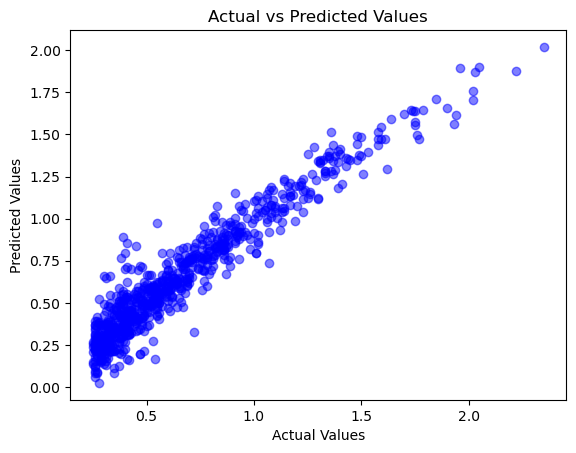

In [40]:
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()

### Performance Metrics for Regression Models

In [42]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"\nMean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 0.08147201988640801
Mean Squared Error (MSE): 0.012266202948000066
Root Mean Squared Error (RMSE): 0.11075289137534995


### Creating DataFrame to View Results

In [44]:
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nResults DataFrame:")
print(results_df.head())


Results DataFrame:
      Actual  Predicted
1344    0.72   0.830851
2887    0.28   0.202740
3592    0.26   0.094943
3617    0.35   0.304388
1813    0.65   0.641006


### R² Value Calculation

In [46]:
r2 = r2_score(y_test, y_pred)
print(f"\nR² Score: {r2}")


R² Score: 0.9164393802291397


In [54]:
#END